# 911 calls analysis

### Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv("C:/Users/Lenovo/Desktop/Datasets/911_calls.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628737 entries, 0 to 628736
Data columns (total 9 columns):
lat          628737 non-null float64
lng          628737 non-null float64
desc         628737 non-null object
zip          552155 non-null float64
title        628737 non-null object
timeStamp    628737 non-null object
twp          628468 non-null object
addr         628737 non-null object
e            628737 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 43.2+ MB


In [7]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,12/10/2015 17:10,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,12/10/2015 17:29,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,12/10/2015 14:39,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,12/10/2015 16:47,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,12/10/2015 16:56,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


Top 5 zipcodes for 911 calls

In [8]:
df['zip'].value_counts().head(5)

19401.0    42861
19464.0    41386
19403.0    32931
19446.0    30510
19406.0    21345
Name: zip, dtype: int64

Top 5 townships for 911 calls

In [9]:
df['twp'].value_counts().head(5)

LOWER MERION    52896
ABINGTON        37887
NORRISTOWN      35311
UPPER MERION    34363
CHELTENHAM      28997
Name: twp, dtype: int64

Take a look at the title column to figure out how many unique title codes are present

In [10]:
len(df['title'].unique())

147

In [11]:
x = df['title'].iloc[0]

In [12]:
x.split(':')[0]

'EMS'

Using the logic shown above,
We create another column named reason, reason being grabbed from the title column
We use the apply function of pandas and lambda funtion to actually apply the required condition to all the data points

In [13]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])
df['Reason']

0             EMS
1             EMS
2            Fire
3             EMS
4             EMS
           ...   
628732    Traffic
628733       Fire
628734        EMS
628735        EMS
628736        EMS
Name: Reason, Length: 628737, dtype: object

What is most common reason for a 911 call?

In [14]:
df['Reason'].value_counts()

EMS        313625
Traffic    220937
Fire        94175
Name: Reason, dtype: int64

Now we just plot the numbers obtained above using a count plot
Y axis for a countplot is count by default so you dont need to specify that

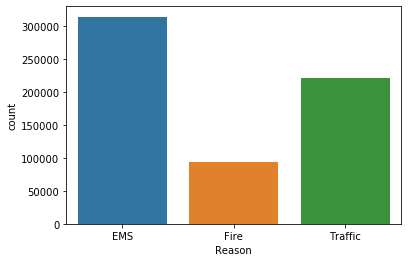

In [15]:
sns.countplot(x='Reason',data=df)

Now let's focus on time related information

In [16]:
type(df['timeStamp'].iloc[0])
#So the object type is string

str

In [17]:
#We use the to_datetime function of pandas to convert this string object to a datetime object
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [18]:
type(df['timeStamp'].iloc[0])
#So now we have a timestamp object

pandas._libs.tslibs.timestamps.Timestamp

In [19]:
#Now, since we've got a datetime object, we can grab various attributes from that object.
#We'll use the apply funtion to create 3 new columns called Hour, Month and Day of week.
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [20]:
df.head()
#So, we get out 3 new columns

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:00,NORRISTOWN,HAWS AVE,1,Fire,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:00,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:00,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,3


In [21]:
#Now, the day of week column looks a bit weird, so we actually map values to a string using the map function 
dmap = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
df['Day of Week'] = df['Day of Week'].map(dmap)

In [22]:
#We check the head to see if the changes are applied
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thursday
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thursday
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:00,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thursday
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:00,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thursday
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:00,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thursday


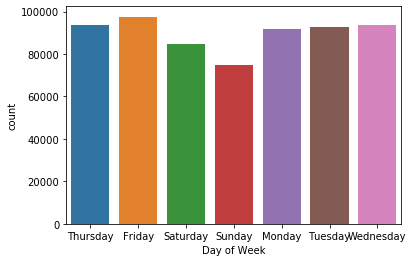

In [23]:
#Now we create a countplot using seaborn for the Day of Week column
sns.countplot(x='Day of Week',data = df)
#We observe that there's a drop on Sunday

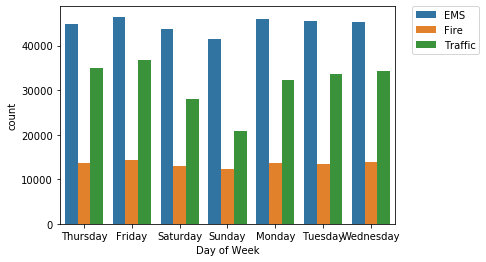

In [24]:
#Now we add a hue to the plot, which adds a legend based on another categorical data column
sns.countplot(x='Day of Week',data = df,hue = 'Reason')
#Could've actually done it in the same step
#To relocate the position of the legend we use the doumentation code
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

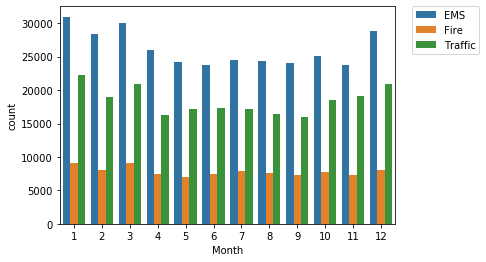

In [25]:
#We do the same for the month column
sns.countplot(x='Month',data = df,hue = 'Reason')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

In [26]:
byMonth = df.groupby('Month').count()

In [27]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
4,49730,49730,49730,43750,49730,49730,49716,49730,49730,49730,49730,49730
5,48467,48467,48467,42257,48467,48467,48443,48467,48467,48467,48467,48467


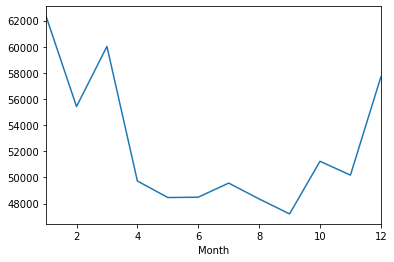

In [28]:
byMonth['lat'].plot()
#Observe the trend of change in the values

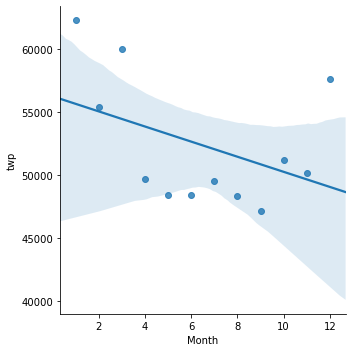

In [29]:
#Now we use seaborn's lmplot() to create a linear fit on the number of calls per month
#We also need to reset the index here
sns.lmplot(x='Month',y='twp',data = byMonth.reset_index())
#So we get a linear model

In [30]:
#We create another column named date that contains the date from the timeStamp column
df['Date'] = df['timeStamp'].apply(lambda t:t.date())

In [31]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thursday,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thursday,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:00,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thursday,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:00,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thursday,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:00,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thursday,2015-12-10


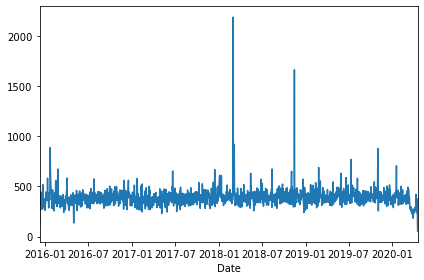

In [32]:
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()
#Doesn't look nice though